## imports

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

## datasets

In [61]:
df = pd.read_csv('Final_Sheet.csv')

#holiday dataset
holiday_df = pd.read_csv('UAE_Holidays.csv')

#weather dataset
#https://meteostat.net/en/station/41194?t=2021-01-01/2021-12-31
weather_df = pd.read_csv('weather.csv')

In [62]:
pd.set_option('display.max_colwidth', None)

In [63]:
df.head()

,Date,Year,Day,DayWeek,Vehicles,Drivers,Trips,RevPerTrips,TripsPerCar,IncomePerCar,...,IncomePerDriver,Distance,PaidDistance,RevKM,ShiftIncome,ShiftTolls,Income-Tolls,OperatingCost,CostPerKm,YieldPerRevKm
0,NaN,NaN,NaN,NaN,Number of vehicles in this day,Number of drivers,number of trips,total revenue/total trips,total trips / total car,total incom/total car,...,total incom/total driver,total km in this day,total paid KM,total paid KM/total KM,Total income in this day,road fees,total incom - road fees,NaN,NaN,NaN
1,1/1/2021,2021.0,1.0,Fri,"4,996","7,737","120,745",33,24,795,...,513,"2,878,696","1,596,844",0.554710882983128,"4,135,264","164,124","3,971,139.88","489,378.32",0.17,0.38
2,1/2/2021,2021.0,2.0,Sat,"4,955","7,621","104,004",33,21,683,...,444,"2,534,566","1,360,274",0.536689121530076,"3,530,878","145,320","3,385,557.60","430,876.22",0.17,0.37
3,1/3/2021,2021.0,3.0,Sun,"4,949","7,606","105,960",30,21,642,...,418,"2,418,782","1,274,102",0.526753547860039,"3,334,281","156,768","3,177,513.04","411,192.94",0.17,0.36
4,1/4/2021,2021.0,4.0,Mon,"4,974","7,628","101,534",30,20,617,...,402,"2,363,776","1,223,709",0.51769245478421,"3,216,162","149,404","3,066,758.24","401,841.92",0.17,0.35


In [64]:
holiday_df.head()

,Date,Eve
0,01-01-2021,New Year's Day
1,11-05-2021,Eid Al Fitr
2,12-05-2021,Eid Al Fitr
3,13-05-2021,Eid Al Fitr
4,19-07-2021,Arafat Day


In [65]:
weather_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-01,21.7,17.8,26.6,0.0,NaN,71,9.4,NaN,1017.4,NaN
1,2021-01-02,21.4,16.6,26.2,0.0,NaN,32,9.1,NaN,1018.2,NaN
2,2021-01-03,20.6,16.7,24.8,0.0,NaN,33,9.4,NaN,1017.0,NaN
3,2021-01-04,19.8,14.4,24.9,0.0,NaN,67,10.9,NaN,1016.7,NaN
4,2021-01-05,19.8,14.0,25.3,0.0,NaN,57,8.8,NaN,1018.2,NaN


In [66]:
#now we'll merge all data
df['Date'] = pd.to_datetime(df['Date'])

holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])
holiday_df['Eve'] = 1

weather_df['Date'] = pd.to_datetime(weather_df['date'])
weather_df.drop(['snow', 'prcp','wpgt', 'tsun'], axis=1, inplace=True)

In [67]:
df = df.merge(holiday_df, on="Date", how="left")
df = df.merge(weather_df, on="Date", how="left")
df['Eve'].fillna(0, inplace = True)

In [68]:
pd.set_option('display.max_colwidth', None)

In [69]:
df

,Date,Year,Day,DayWeek,Vehicles,Drivers,Trips,RevPerTrips,TripsPerCar,IncomePerCar,...,CostPerKm,YieldPerRevKm,Eve,date,tavg,tmin,tmax,wdir,wspd,pres
0,NaT,NaN,NaN,NaN,Number of vehicles in this day,Number of drivers,number of trips,total revenue/total trips,total trips / total car,total incom/total car,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,2021.0,1.0,Fri,"4,996","7,737","120,745",33,24,795,...,0.17,0.38,1.0,2021-01-01,21.7,17.8,26.6,71.0,9.4,1017.4
2,2021-01-02,2021.0,2.0,Sat,"4,955","7,621","104,004",33,21,683,...,0.17,0.37,0.0,2021-01-02,21.4,16.6,26.2,32.0,9.1,1018.2
3,2021-01-03,2021.0,3.0,Sun,"4,949","7,606","105,960",30,21,642,...,0.17,0.36,0.0,2021-01-03,20.6,16.7,24.8,33.0,9.4,1017.0
4,2021-01-04,2021.0,4.0,Mon,"4,974","7,628","101,534",30,20,617,...,0.17,0.35,0.0,2021-01-04,19.8,14.4,24.9,67.0,10.9,1016.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-12-27,2021.0,27.0,Mon,"4,815","6,835","118,121",36,25,872,...,0.23,0.37,0.0,2021-12-27,23.7,21.0,26.0,268.0,14.6,1017.0
362,2021-12-28,2021.0,28.0,Tue,"4,867","6,868","120,284",35,25,858,...,0.23,0.38,0.0,2021-12-28,22.6,19.0,26.0,226.0,10.0,1017.0
363,2021-12-29,2021.0,29.0,Wed,"4,903","6,923","125,083",35,26,893,...,0.23,0.38,0.0,2021-12-29,22.5,19.0,26.0,92.0,9.1,1016.4
364,2021-12-30,2021.0,30.0,Thu,"4,933","6,980","128,577",35,26,902,...,0.23,0.39,0.0,2021-12-30,24.0,21.0,28.0,94.0,7.5,1016.1


In [70]:
df.drop(0, inplace = True)

Let's look closer into initial data:
- Date - useless
- Year - useless
- Day and DayWeek - features
- Vehicles - value to optimize
- Trips - value to predict
- Drivers - not sure if needed
- RevPerTrips, TripsPerCar, IncomePerCar, TripsPerDriver, IncomePerDriver -- all dependable values
- Distance - to predict
- PaidDistance - to predict
- RevKM - dependable
- Income-Tolls - to predict
- ShiftIncome and ShiftTolls used above, so useless
- OperatingCost - to predict
- CostPerKm - constant
- YieldPerRevKm - dependable

## Feature engineering

In [71]:
df.columns = [x.strip() for x in df.columns]

In [72]:
df['Vehicles'] = df['Vehicles'].str.replace(",","").str.strip().astype(int)
df['Trips'] = df['Trips'].str.replace(",","").str.strip().astype(int)
df['Drivers'] = df['Drivers'].str.replace(",","").str.strip().astype(int)
df['Distance'] = df['Distance'].str.replace(",","").str.strip().astype(int)
df['PaidDistance'] = df['PaidDistance'].str.replace(",","").str.strip().astype(int)
df['Income'] = df['Income-Tolls'].str.replace(".","").str.replace(",","").str.strip().astype(int)
df['OperatingCost'] = df['OperatingCost'].str.replace(".","").str.replace(",","").str.strip().astype(int)
#df['Revenue'] = df['Income'] - df['OperatingCost']

#Time lag features. Notice, we're not lagging Vehicles
df['Trips_1'] = df['Trips'].shift()
df['Trips_7'] = df['Trips'].shift(7)
df['Distance_1'] = df['Distance'].shift()
df['Distance_7'] = df['Distance'].shift(7)
df['PaidDistance_1'] = df['PaidDistance'].shift()
df['PaidDistance_7'] = df['PaidDistance'].shift(7)
df['Income_1'] = df['Income'].shift()
df['Income_7'] = df['Income'].shift(7)
df['OperatingCost_1'] = df['OperatingCost'].shift()
df['OperatingCost_7'] = df['OperatingCost'].shift(7)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['DayWeek'] = le.fit_transform(df['DayWeek'])

/var/folders/pm/pyhv388x3437fw75md066hd40000gn/T/ipykernel_3742/2102221953.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income-Tolls'].str.replace(".","").str.replace(",","").str.strip().astype(int)
/var/folders/pm/pyhv388x3437fw75md066hd40000gn/T/ipykernel_3742/2102221953.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['OperatingCost'] = df['OperatingCost'].str.replace(".","").str.replace(",","").str.strip().astype(int)


In [73]:
df.dropna(axis=0, inplace=True)

In [74]:
# can't use 'Vehicles', 'Trips', 'Distance', 'PaidDistance' as we won't know them beforehand
cols = ['Day', 'DayWeek', 'Eve', 'Vehicles', 'Income', 'OperatingCost', 'tavg','tmin','tmax','wdir','wspd','pres']

shift_cols = ['Trips_1', 'Trips_7', 'Distance_1', 'Distance_7', 'PaidDistance_1', 'PaidDistance_7', 
              'Income_1', 'Income_7', 'OperatingCost_1', 'OperatingCost_7']

In [75]:
new_df = df[cols + shift_cols]

## Feature analysis

<AxesSubplot:>

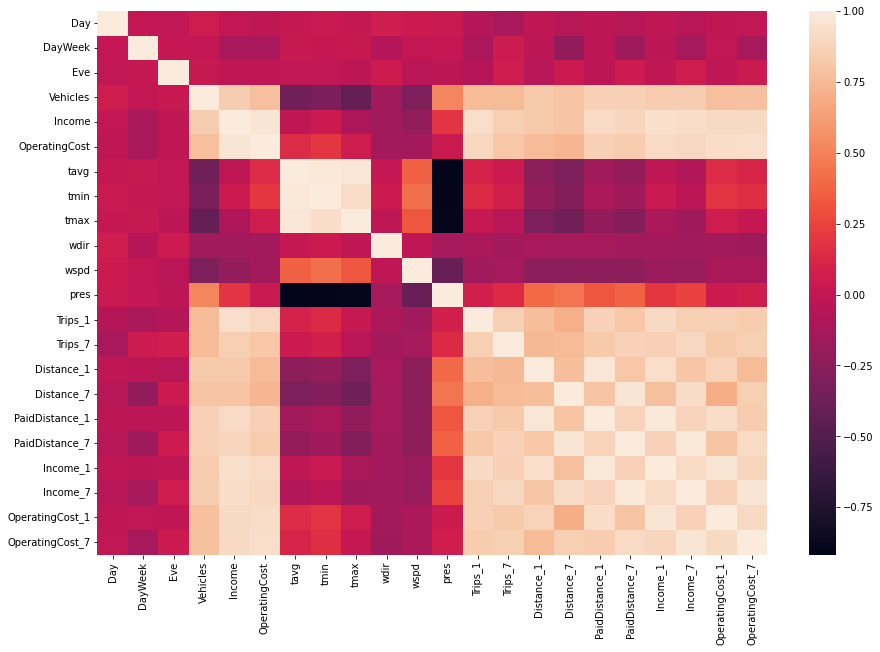

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr())

The idea is to predict the values of *Income*, *OperatingCost* values using **Vehicles** features as one of the features. Then varying it, we can predict *Income* and *OperatingCost*

## ML part

In [77]:
#save some random day for validation
val_row = pd.DataFrame(new_df.loc[300]).T 
new_df.drop(300, inplace=True)

val_row = val_row.drop(['Income','OperatingCost'], axis = 1)
number_of_total_rows = 30
val_row = val_row.append([val_row]*(number_of_total_rows-1),ignore_index=True)

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Predicting Income

In [79]:
x = new_df.drop(['Income','OperatingCost'], axis = 1)
y = new_df['Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

regr = RandomForestRegressor()
regr.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [81]:
y_prediction =  regr.predict(x_test)

In [82]:
score=r2_score(y_test,y_prediction)
print('r2',score)
print('mse',mean_squared_error(y_test,y_prediction))
print('rmse',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 0.9448449446371959
mse 327154141115910.6
rmse 18087402.829480816


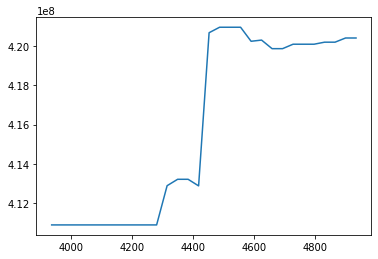

In [83]:
minimum_vehicles = new_df['Vehicles'].min()
maximum_vehicles = new_df['Vehicles'].max()
val_row['Vehicles'] = np.linspace(minimum_vehicles, maximum_vehicles, num=number_of_total_rows)

#varying Vehicles parameter influencing Income
y_prediction_income = regr.predict(val_row)
plt.plot(val_row['Vehicles'], y_prediction_income)

### Predicting Costs

In [84]:
x = new_df.drop(['Income','OperatingCost'], axis = 1)
y = new_df['OperatingCost']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

regr = RandomForestRegressor()
regr.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
y_prediction =  regr.predict(x_test)

In [86]:
score=r2_score(y_test,y_prediction)
print('r2',score)
print('mse',mean_squared_error(y_test,y_prediction))
print('rmse',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 0.9207133457676819
mse 7265757229514.314
rmse 2695506.859481963


In [87]:
minimum_vehicles = new_df['Vehicles'].min()
maximum_vehicles = new_df['Vehicles'].max()
val_row['Vehicles'] = np.linspace(minimum_vehicles, maximum_vehicles, num=number_of_total_rows)

#varying Vehicles parameter influencing Income
y_prediction_operation_cost = regr.predict(val_row)

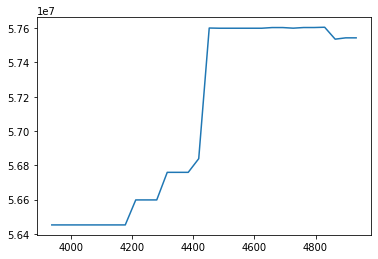

In [88]:
plt.plot(val_row['Vehicles'], y_prediction_operation_cost)

## Vehicle <-> revenue

In [89]:
val_income = y_prediction_income - y_prediction_operation_cost

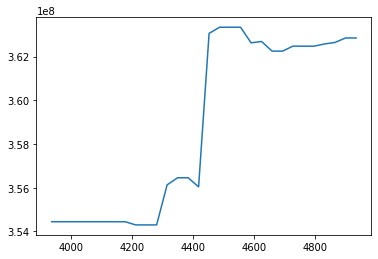

In [90]:
plt.plot(val_row['Vehicles'], val_income)